In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Generate data (2 features example)

x_min = 0
x_max = 1000
N = 1000

x1 = np.random.uniform(x_min, x_max, size=N)
x2 = np.random.uniform(x_min, x_max, size=N)

X = np.column_stack((x1, x2)) # create (N * 2) array
y = 2*X[:,0] + X[:,1] + 5 + 200*np.random.randn(N)


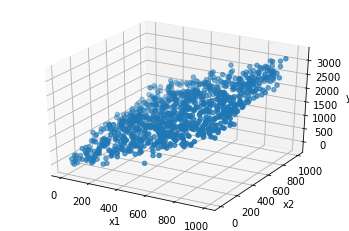

In [23]:
# Plot data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y)

plt.show()

**How to find the line of best fit?**

Now $x_i$ contains multiple features so $\hat{y}_i$ will be given by

$\hat{y}_i = w_0 + w_1 x_{i1} + ... + w_D x_{iD} = w^{T}x_i$

where D is number of features.

In matrix form

$\hat{y}_{N\times 1} = X_{N \times D} w_{D \times 1}$

where N is the number of samples.
\begin{align}
\begin{bmatrix}
y_1\\
.\\
.\\
.\\
y_N 
\end{bmatrix}
=
\begin{bmatrix}
x_{11}&.&.&.&x_{1D}\\
.&.&.&.&.\\
.&.&.&.&.\\
.&.&.&.&.\\
x_{N1}&.&.&.&x_{ND}
\end{bmatrix}
\begin{bmatrix}
w_1\\
.\\
.\\
.\\
w_D 
\end{bmatrix}
\end{align}

we want to minimize the cost function (mean squared error)

$E = \frac{1}{N}\sum_i(y_i - \hat{y}_i)^2 = \frac{1}{N}\sum_i(y_i - w^{T}x_i)^2$


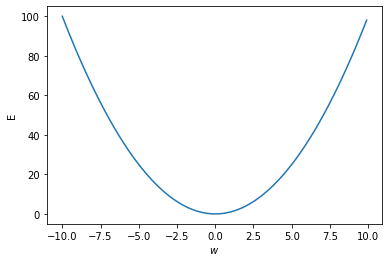

#### 1. **Calculating analytical solution with NumPy**

We can find the exact solution by solving

$\frac{\partial E}{\partial w_j} = \sum_i 2(y_i - w^T x_{ij})(-x_{ij}) = 0,\;\;\; j=1,...,D$

...obtaining

$w = (X^T X)^{-1} X^T y$

In [24]:
# Numpy has a special function to solve linear equations
# Ax = b --> x = np.linalg.solve(A, b)

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

In [25]:
# predict the result for (x1=5, x2=50)
np.array([[50, 50]]).dot(w)

array([149.61314439])

In [26]:
y_pred = X.dot(w)
y_pred[:5]

array([1075.14664875, 2151.88824903, 2197.78950217,  778.24897778,
       1262.50566567])

In [27]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9059821159023111

#### 2. **Using Scikit-Learn**

In [28]:
from sklearn.linear_model import LinearRegression

# train the linear model
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [29]:
# calculate R^2
reg.score(X, y)

0.9061058406107683

In [30]:
y_pred = reg.predict(X)
y_pred[:5]

array([1083.63670484, 2147.49213323, 2194.32952469,  784.98315953,
       1263.13029302])

In [31]:
r2_score(y, y_pred)

0.9061058406107683

#### 3. **Using statsmodels**

In [32]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     4811.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:19:30   Log-Likelihood:                -6728.0
No. Observations:                1000   AIC:                         1.346e+04
Df Residuals:                     997   BIC:                         1.348e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3172     16.853      1.146      0.252     -13.755      52.389
x1             1.9877      0.023     88.097      0.000       1.943       2.032
x2             0.9707      0.023     42.795      0.000       0.926       1.015
==============================================================================
Omnibus:                        0.772   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.844
Skew:                          -0.060   Prob(JB):                        0.656
Kurtosis:                       2.924   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
y_pred = results.predict(X1)
y_pred[:5]

array([1083.63670484, 2147.49213323, 2194.32952469,  784.98315953,
       1263.13029302])

In [34]:
r2_score(y, y_pred)

0.9061058406107683

##### **Adding a new (random) feature...**

In [35]:
X.shape

(1000, 2)

In [36]:
random_column = np.random.choice([20, 30, 40], size=len(X)).reshape(-1,1)

In [37]:
random_column.shape

(1000, 1)

In [38]:
X = np.hstack((X, random_column.reshape(-1,1)))

In [39]:
X[:5]

array([[435.61991146, 204.42449188,  40.        ],
       [755.34301395, 645.69340272,  40.        ],
       [853.71185984, 492.51414427,  30.        ],
       [ 44.60329267, 697.44303467,  20.        ],
       [170.47895452, 932.26664711,  20.        ]])

In [40]:
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     3204.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:19:30   Log-Likelihood:                -6728.0
No. Observations:                1000   AIC:                         1.346e+04
Df Residuals:                     996   BIC:                         1.348e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2867     29.093      0.972      0.331     -28.803      85.377
x1             1.9881      0.023     87.979      0.000       1.944       2.032
x2             0.9706      0.023     42.768      0.000       0.926       1.015
x3            -0.3001      0.793     -0.378      0.705      -1.857       1.257
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.868
Skew:                          -0.061   Prob(JB):                        0.648
Kurtosis:                       2.924   Cond. No.                     3.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""